In [1]:
#import dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
#clean data
wine_dataframe=pd.read_csv("Resources/wine_dataset.csv")
wine_dataframe_clean=wine_dataframe.drop(["Unnamed: 0","region_2", "description"], axis=1)
wine_dataframe_clean

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La BrÃ»lade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...,...
150925,Italy,NaN,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,CuvÃ©e Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,Grand Brut RosÃ©,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


In [3]:
clean_wine_data=wine_dataframe_clean.dropna()
clean_wine_data

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La BrÃ»lade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...,...
150923,France,Demi-Sec,91,30.0,Champagne,Champagne,Champagne Blend,Jacquart
150924,France,Diamant Bleu,91,70.0,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150926,France,CuvÃ©e Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora


In [ ]:
#count breakdown
points_count=clean_wine_data["points"].value_counts().tolist()
points_labels=clean_wine_data["points"].unique()
points_labels
points_count

#chart for point breakdown
plt.bar(points_labels,points_count, color='b')

plt.title("Wine Point Count")
plt.xlabel("Points Won by Wines in Dataset")
plt.ylabel("Frequency of Points")

In [ ]:
variety_count=clean_wine_data["variety"].value_counts().tolist()
variety_labels=clean_wine_data["variety"].unique()
variety_num=len(variety_labels)
variety_num


In [ ]:
winery_count=clean_wine_data["winery"].value_counts().tolist()
winery_labels=clean_wine_data["winery"].unique()
number_winery=len(winery_labels)
number_winery


In [ ]:
country_count=clean_wine_data["country"].value_counts()
country_labels=clean_wine_data["country"].unique()

#variety chart
# plt.bar(country_labels,country_count, color='b')
# plt.title("Country Count for Wine in Dataset")
# plt.xlabel("Countries the Wines are from")
# plt.ylabel("Country Frequency")


In [ ]:
#sort by country and then point break down and determine the percentage of wines that score well for each of the countries
usa_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="US")]
point_breakdown_usa=usa_country_count["points"].value_counts().tolist()
point_breakdown_usa_labels=usa_country_count["points"].unique()
point_breakdown_usa_labels

plt.bar(point_breakdown_usa_labels,point_breakdown_usa, color='b')
plt.title("USA Count for Wine in Dataset")
plt.xlabel("Countries the Wines are from")
plt.ylabel("Country Frequency")

In [ ]:
spain_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Spain")]
point_breakdown_spain=spain_country_count["points"].value_counts().tolist()
point_breakdown_spain_labels=spain_country_count["points"].unique()
point_breakdown_usa_labels

# plt.bar(point_breakdown_spain_labels,point_breakdown_spain, color='r')
# plt.title("Spain Count for Wine in Dataset")
# plt.xlabel("Points from Spain")
# plt.ylabel("Point Frequency Spain")


In [ ]:
france_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="France")]
point_breakdown_france=france_country_count["points"].value_counts().tolist()
point_breakdown_france_labels=france_country_count["points"].unique()


# plt.bar(point_breakdown_france_labels,point_breakdown_france, color='y')
# plt.title("France Count for Wine in Dataset")
# plt.xlabel("Points from France")
# plt.ylabel("Point Frequency France")

In [ ]:
italy_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Italy")]
point_breakdown_italy=italy_country_count["points"].value_counts().tolist()
point_breakdown_italy_labels=italy_country_count["points"].unique()


# plt.bar(point_breakdown_italy_labels,point_breakdown_italy, color='g')
# plt.title("Italy Count for Wine in Dataset")
# plt.xlabel("Points from Italy")
# plt.ylabel("Point Frequency Italy")

In [ ]:
argentina_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")]
point_breakdown_argentina=argentina_country_count["points"].value_counts()
point_breakdown_argentina_labels=argentina_country_count["points"].unique()


# plt.bar(point_breakdown_argentina_labels,point_breakdown_argentina, color='c')
# plt.title("Argentina Count for Wine in Dataset")
# plt.xlabel("Points from Argentina")
# plt.ylabel("Point Frequency Argentina")

In [ ]:
#problem with canada doesnt makes sense the point breakdown 
canada_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Canada")]
point_breakdown_canada=canada_country_count["points"].value_counts().tolist()
point_breakdown_canada

# plt.bar(point_breakdown_argentina_labels,point_breakdown_argentina, color='c')
# plt.title("Argentina Count for Wine in Dataset")
# plt.xlabel("Points from Argentina")
# plt.ylabel("Point Frequency Argentina")


In [ ]:
australia_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Australia")]
point_breakdown_australia=australia_country_count["points"].value_counts().tolist()
point_breakdown_australia

# plt.bar(point_breakdown_argentina_labels,point_breakdown_argentina, color='c')
# plt.title("Argentina Count for Wine in Dataset")
# plt.xlabel("Points from Argentina")
# plt.ylabel("Point Frequency Argentina")


In [5]:
summary_stat_points=clean_wine_data["points"].describe()
summary_stat_points

count    77284.000000
mean        88.231678
std          3.303169
min         80.000000
25%         86.000000
50%         88.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [ ]:
filter_df=clean_wine_data.loc[(clean_wine_data["points"]>=93) & (clean_wine_data["points"]<=96)]
country_filter=filter_df["country"].value_counts()
country_filter
# summary=filter_df.groupby(["points"])

In [ ]:
#original count
count_us=len(clean_wine_data.loc[(clean_wine_data["country"]=="US")])
count_italy=len(clean_wine_data.loc[(clean_wine_data["country"]=="Italy")])
count_spain=len(clean_wine_data.loc[(clean_wine_data["country"]=="Spain")])
count_france=len(clean_wine_data.loc[(clean_wine_data["country"]=="France")])
count_argentina=len(clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")])
count_canada=len(clean_wine_data.loc[(clean_wine_data["country"]=="Canada")])
count_australia=len(clean_wine_data.loc[(clean_wine_data["country"]=="Australia")])


In [ ]:
#count for 93-96
count_us_filter=len(filter_df.loc[(filter_df["country"]=="US")])
count_italy_filter=len(filter_df.loc[(filter_df["country"]=="Italy")])
count_spain_filter=len(filter_df.loc[(filter_df["country"]=="Spain")])
count_france_filter=len(filter_df.loc[(filter_df["country"]=="France")])
count_argentina_filter=len(filter_df.loc[(filter_df["country"]=="Argentina")])
count_canada_filter=len(filter_df.loc[(filter_df["country"]=="Canada")])
count_australia_filter=len(filter_df.loc[(filter_df["country"]=="Australia")])


In [ ]:
#percent of wines from the countries that scored between 93 and 96

In [ ]:
usa_percent=(count_us_filter/count_us)*100
usa_percent

In [ ]:
italy_percent=(count_italy_filter/count_italy)*100
italy_percent

In [ ]:
spain_percent=(count_spain_filter/count_spain)*100
spain_percent

In [ ]:
france_percent=(count_france_filter/count_france)*100
france_percent

In [ ]:
argentina_percent=(count_argentina_filter/count_argentina)*100
argentina_percent

In [ ]:
canada_percent=(count_canada_filter/count_canada)*100
canada_percent

In [ ]:
australia_percent=(count_australia_filter/count_australia)*100
australia_percent

In [30]:
#wines with scores higher than 88 points from each country
greater_than_average=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
greater_than_average

,country,designation,points,price,province,region_1,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,La BrÃ»lade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...,...
150923,France,Demi-Sec,91,30.0,Champagne,Champagne,Champagne Blend,Jacquart
150924,France,Diamant Bleu,91,70.0,Champagne,Champagne,Champagne Blend,Heidsieck & Co Monopole
150926,France,CuvÃ©e Prestige,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora


In [31]:
greater_count_us=len(greater_than_average.loc[(greater_than_average["country"]=="US")])
greater_count_italy=len(greater_than_average.loc[(greater_than_average["country"]=="Italy")])
greater_count_spain=len(greater_than_average.loc[(greater_than_average["country"]=="Spain")])
greater_count_france=len(greater_than_average.loc[(greater_than_average["country"]=="France")])
greater_count_argentina=len(greater_than_average.loc[(greater_than_average["country"]=="Argentina")])
greater_count_canada=len(greater_than_average.loc[(greater_than_average["country"]=="Canada")])
greater_count_australia=len(greater_than_average.loc[(greater_than_average["country"]=="Australia")])


2022

In [ ]:
#wines with scores lower than 88 points
less_than_average=clean_wine_data.loc[(clean_wine_data["points"]<=88)]
less_than_average

In [ ]:
price_greater_than=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
greater_price_count=price_greater_than["price"].value_counts()
greater_price_count

#take out prices with one they are outliers

In [ ]:
price_less_than=clean_wine_data.loc[(clean_wine_data["points"]<=88)]
points_prices=price_less_than["price"].value_counts()

#take out prices with one they are outliers
    

In [ ]:
#seperate (filterby) the wines that come from the USA and then breakdown by province 
us_wines=clean_wine_data[clean_wine_data.country=="US"]
us_wine_provinces_count=us_wines["province"].value_counts().tolist()
us_wine_provinces_labels=us_wines["province"].unique()

# chart to show most popular province in the US for wine. BAR CHART?
plt.bar(country_labels,country_count, color='b')
plt.title("Country Count for Wine in Dataset")
plt.xlabel("Countries the Wines are from")
plt.ylabel("Country Frequency")

In [ ]:
#breakdown by region of California
california_wine=clean_wine_data[clean_wine_data.province=="California"]
cali_region_wine_count=california_wine["region_1"].value_counts().tolist()
cali_region_wine_labels=california_wine["region_1"].unique()
cali_region_len=len(cali_region_wine_labels)
cali_region_len
#chart or graph

<IPython.core.display.Javascript object>


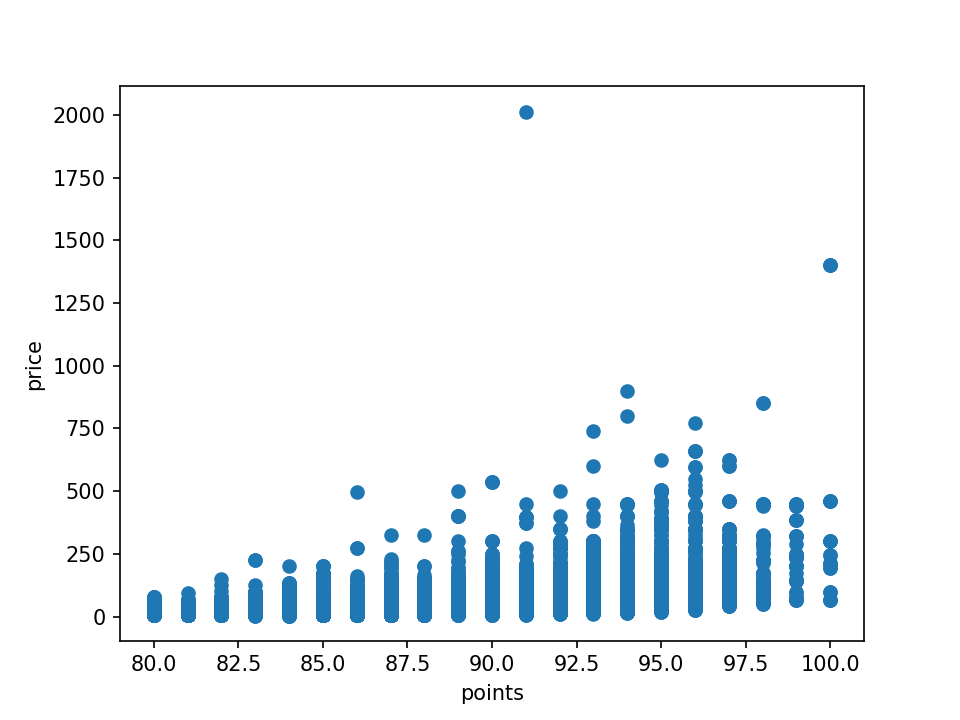

In [4]:
plt.scatter(clean_wine_data.iloc[:,2],clean_wine_data.iloc[:,3])
plt.xlabel("points")
plt.ylabel("price")
plt.show()

In [14]:
#grouping the wines by variety and determining the average price and points for that variety 
price_filter_df=clean_wine_data.loc[(clean_wine_data["points"]>=93) & (clean_wine_data["points"]<=96)]
variety_grouped_price_points=price_filter_df.groupby(["variety"]).mean()
variety_grouped_price_points

,points,price
variety,,
Aglianico,93.428571,64.071429
Albana,93.000000,33.000000
AlbariÃ±o,93.000000,26.333333
Alsace white blend,94.444444,49.111111
Barbera,93.000000,47.000000
...,...,...
Viognier-Roussanne,94.000000,30.000000
White Blend,93.661290,49.548387
White Riesling,94.142857,32.142857


In [16]:
country_grouped_price_points=price_filter_df.groupby(["country"]).mean()
country_grouped_price_points

,points,price
country,,
Argentina,93.614035,88.570175
Australia,93.722467,102.207048
Canada,93.000000,38.333333
France,93.728140,108.209857
Italy,93.727509,94.346886
Spain,93.802974,114.185874
US,93.778716,63.081926


In [28]:
grouped_country_variety_price_point=price_filter_df.groupby(["country","variety"]).mean()
grouped_country_variety_price_point

points       price
country   variety                                         
Argentina Bordeaux-style Red Blend   93.555556   92.000000
          Cabernet Blend             93.000000   38.000000
          Cabernet Sauvignon         93.333333   58.333333
          Cabernet Sauvignon-Malbec  93.500000  171.500000
          Malbec                     93.764706   84.794118
...                                        ...         ...
US        Viognier                   93.470588   31.500000
          Viognier-Roussanne         94.000000   30.000000
          White Blend                93.702703   40.135135
          White Riesling             94.142857   32.142857
          Zinfandel                  93.682759   39.648276

[198 rows x 2 columns]

In [25]:
grouped_country_variety_price_point_sum=price_filter_df.groupby(["country","variety"]).sum()
grouped_country_variety_price_point_sum

points   price
country   variety                                  
Argentina Bordeaux-style Red Blend      842   828.0
          Cabernet Blend                 93    38.0
          Cabernet Sauvignon            280   175.0
          Cabernet Sauvignon-Malbec     561  1029.0
          Malbec                       6376  5766.0
...                                     ...     ...
US        Viognier                     3178  1071.0
          Viognier-Roussanne            282    90.0
          White Blend                  3467  1485.0
          White Riesling                659   225.0
          Zinfandel                   13584  5749.0

[198 rows x 2 columns]